<a href="https://colab.research.google.com/github/rrodrigu3z/ml-examples/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Demo - Moonshot Partners

The following notebook explores some basics examples of classification using Deep Neural Networks using Keras.

We will be using the [Fasion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), which contains 60.000 images of clothes for training and 10.000 for test. It's benchmarking dataset used in machine learning algorithms, and a bit more challenging than the traditional [MNIST](http://yann.lecun.com/exdb/mnist/).

The main goal is to explore how to tackle a basic multi-class classification problem using Feed Forward/Fully Connected networks and basic Convolutional Neural Networks.

---
# Python Modules

Let's load [Keras](https://keras.io/) and some basics libraries to use.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn.metrics import classification_report

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


---
# Explore Fashion-MNIST Dataset

Given that Fashion-MNIST is a quite known and benchmark dataset, Keras includes an easy way to load it and easily split it in train and test sets.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Lets explore what we got:

In [0]:
# Print dimesions of data strcutures
print('Train set inputs (shape): ', x_train.shape)
print('Train set output (shape): ', y_train.shape)
print('Test set inputs (shape):  ', x_test.shape)
print('Test set output (shape):  ', y_test.shape)

Train set inputs (shape):  (60000, 28, 28)
Train set output (shape):  (60000,)
Test set inputs (shape):   (10000, 28, 28)
Test set output (shape):   (10000,)


In [0]:
print("Training set:")
print("Number of observations: {}\nImage dimensions: {}x{}".format(*x_train.shape))
print("\nTest Set:")
print("Number of observations: {}\nImage dimensions: {}x{}".format(*x_test.shape))

Training set:
Number of observations: 60000
Image dimensions: 28x28

Test Set:
Number of observations: 10000
Image dimensions: 28x28


**Observations:**
* The **training set** contains **60.000** images, and **test** set has **10.000**. Image resolution is **28x28** pixeles
* Given we only have 2 dimensions, we have grayscale images.

So, let's explore now what an image looks like

In [0]:
sample_image = x_train[0]
print("Image dimensions: ", sample_image.shape)
print("Examples of representation of pixel data: ")
sample_image[2:5]

Image dimensions:  (28, 28)
Examples of representation of pixel data: 


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3]], dtype=uint8)

Now, let's explore the targets

In [0]:
print("Y train sample: ", list(set(y_train)))
print("Y train size:", len(y_train))
print("Y test sample: ", list(set(y_test)))
print("Y test size:", len(y_test))

Y train sample:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y train size: 60000
Y test sample:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y test size: 10000


**Observations:** 
Each example is represented by an image  composed by 28x28 intensity levels (between 0 and 255). We will need to normalize those values to 0..1 float.

Regarding Y, we have 10 clases (from 0 to 9). The following table (taken from [Fasion-MNIST repo]( https://github.com/zalandoresearch/fashion-mnist)) describes the 10 classes:


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

So let's normalize the inputs:

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
sample_image = x_train[0]
print("Example of new representation of pixel data: ")
sample_image[3]

Example of new representation of pixel data: 


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.05098039, 0.28627451, 0.        , 0.        , 0.00392157,
       0.01568627, 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.00392157, 0.        ])

Now let's visualize some images, first let's create some utility functions:

In [0]:
CLASS_NAMES = ['T-shirt / Top', 'Trouser', 'Pullover', 
               'Dress','Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle Boot']

def humanize_class(class_id):
    return CLASS_NAMES[class_id]

def show_images_grid(images, y):
    '''Show a grid of images with their class'''
    plt.figure(figsize=(10,10))
    
    for i in range(len(images)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(humanize_class(y[i]))
    plt.show()

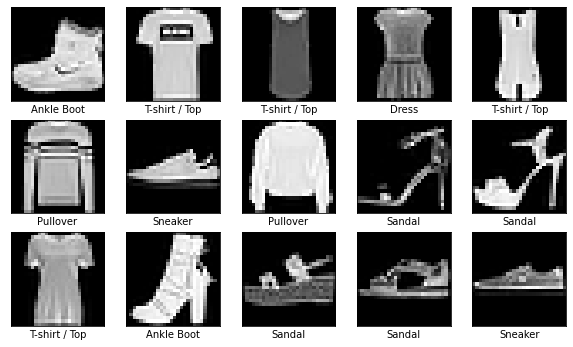

In [0]:
# Show 15 images with their class from the training set
show_images_grid(x_train[0:15], y_train[0:15])

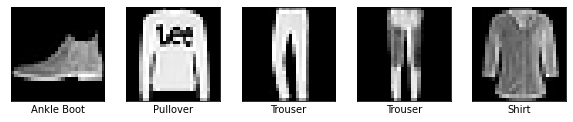

In [0]:
# Show 5 images from the test set
show_images_grid(x_test[0:5], y_test[0:15])

So, we have some low res / small images, which is fine given we don't want to train for hours our network :p 

---
# Training

First, we need to define some functions to plot the training history to be able to easier interpret what happened during training.

In [0]:
def plot_metric(train, val, y_label, loc, title='Model'):
    '''Plot training history (train and val per epoch)'''
    plt.plot(train)
    plt.plot(val)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc=loc)
    
def plot_training(history, model_name='Model'):
    '''Plot loss and accuracy from the training history'''
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    plot_metric(history.history['loss'], history.history['val_loss'],  
                y_label='Loss', 
                loc='upper right',
                title=f'{model_name} - Loss')

    plt.subplot(2,2,2)
    plot_metric(history.history['acc'], history.history['val_acc'],  
                y_label='Accuracy', 
                loc='upper left',
                title=f'{model_name} - Accuracy')
    plt.show()

In [0]:
def evaluate_model(model, x, y):
    '''Evaluates a model and print Loss and Accuracy'''
    loss, acc = model.evaluate(x, y, verbose=1)
    print("Loss: ", loss)
    print("ACC: ", acc)

    
def model_classfication_report(model, x, y):
    model_pred = model.predict(x, verbose=1)
    # Use argmax to get the class with max probability (revert one-hot encoding)
    model_pred = np.argmax(model_pred, axis=1)
    report = classification_report(np.argmax(y_test_onehot, axis=1), model_pred)  
    print(report)
    return model_pred

In order to train our networks we will need to make a little change to our target set,  We need to encode it as one-hot vectors, so we will have a 10 elements vector, where only one of elements is active (1) and the other elements are zero.

In [7]:
# Create one-hot vectors for y_train and y_test
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

y_train_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## A Very Very Simple Neural Network

So let's try first with a very simple feed forward network with 2 hidden layers. We will be using `sigmoid` as the activation function for the hidden layers in this simple example, just for exploring purposes. Also, the output layer will use `softmax` activation, so we can transform the output vector to categorical probabilities.

Check more about [activation functions](https://keras.io/api/layers/activations/) in Keras documentation.

In [10]:
model = Sequential()

# We want to flatten the input, so the 28x28 matrix will 
# be converted to a vector of. 784 elements.
model.add(Flatten(input_shape=(28, 28)))

# Hidden layers with sigmoid activation
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

# Output layer with 10 nodes. We have a 10 class problem so
# we want only 1 neuron active on the output. 
# The activation function si softmax
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Even with this small network, we have more than 100k parameters to learn!!!! So we can have an idea of the amount of calculations to be done on bigger and complex topologies.

The next step is to compile our model, we need to specify the optimizer (we will use our traditional Stochastic Gradient Descend), the loss function to use (`categorical_crossentropy` given there are two or more label classes and one-hot encoded) and we are collecting `accuracy` during training.

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['acc'])

Now we're ready to train!! (finally xD), so we need to define the number of epochs and the batch size.
We will be using 20% of out training data for validation during training.

In [0]:
# Epoch y batch size
epochs = 10
batch_size = 128

In [13]:
history = model.fit(
    x_train, 
    y_train_onehot, 
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2, # 20% held-out 
    verbose=1
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/step - loss: 2.2796 - acc: 0.2954 - val_loss: 2.2251 - val_acc: 0.5198
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 2.1770 - acc: 0.5562 - val_loss: 2.1218 - val_acc: 0.5209
Epoch 3/10
48000/48000 [==============================] - 1s 27us/step - loss: 2.0512 - acc: 0.5532 - val_loss: 1.9698 - val_acc: 0.5658
Epoch 4/10
48000/48000 [==============================] - 1s 27us/step - loss: 1.8791 - acc: 0.5617 - val_loss: 1.7822 - val_acc: 0.5972
Epoch 5/10
48000/48000 [==============================] - 1s 27us/step - loss: 1.6953 - acc: 0.5944 - val_loss: 1.6077 - val_acc: 0.6075
Epoch 6/10
48000/48000 [==============================] - 1s 27us/step - loss: 1.5382 - acc: 0.6172 - val_loss: 1.4660 - val_acc: 0.6471
Epoch 7/10
48000/48000 [==============================] - 1s 27us/step - loss: 1.4124 - acc: 0.6352 - val_loss: 1.3528 - val_acc

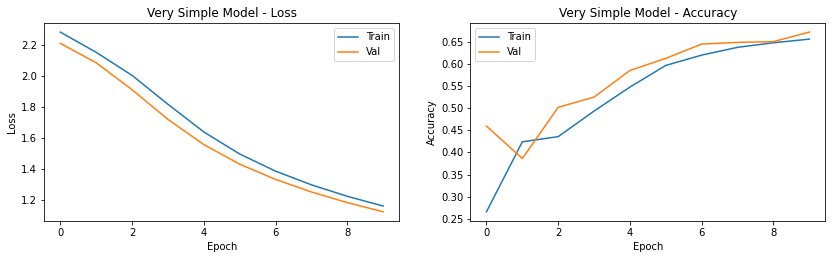

In [0]:
# Plot training history
plot_training(history, model_name='Very Simple Model')

We can see that the loss function is decreasing a bit slow, and the most probable reason for this is because of Sigmoid activation. We will explore ReLU. Also, it's important to notice that we're not seeing overfitting, given the validation curve follows quite well the train curve and we are nos seeing validation accuracy drop significatly below training data, we can tell our model is not "memorizing" the training set.

Now, let's eval the model with the test data and generate a classification report.

In [0]:
evaluate_model(model, x_test, y_test_onehot)
print('\nClassification Report: ')
model_classfication_report(model, x_test, y_test_onehot)

10000/10000 [==============================] - 0s 16us/step
Loss:  1.1372483451843263
ACC:  0.65420001745224

Classification Report: 
10000/10000 [==============================] - 0s 15us/step
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1000
           1       0.79      0.91      0.84      1000
           2       0.44      0.66      0.53      1000
           3       0.68      0.58      0.63      1000
           4       0.48      0.32      0.39      1000
           5       0.84      0.44      0.58      1000
           6       0.38      0.18      0.25      1000
           7       0.70      0.86      0.77      1000
           8       0.87      0.87      0.87      1000
           9       0.73      0.94      0.82      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



Not very impressive results, but we will be improving it soon :)

## Very Very Simple Neural Network with ReLU

Sigmoid is an activation function that causes a lot of problems, it was used in the past, but it's not ideal, because it can easely suffer of saturation and causes the dying of gradients. A more common activation fuction today is ReLU (Rectified Linear Unit). Let's give it a try.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 25us/step - loss: 1.2194 - acc: 0.6248 - val_loss: 0.8144 - val_acc: 0.7351
Epoch 2/10
48000/48000 [==============================] - 1

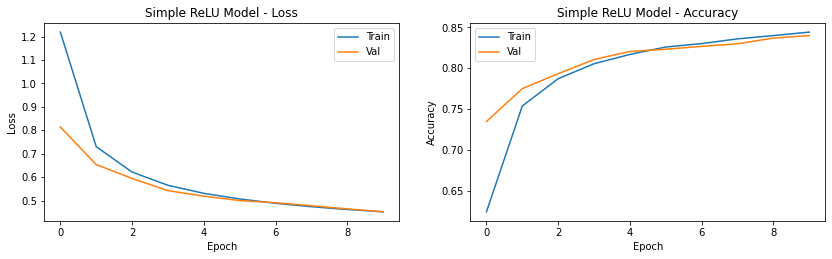

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train_onehot, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2, # 20% held-out 
                    verbose=1)
plot_training(history, model_name='Simple ReLU Model')

With only switching from `sigmoid` to `relu` we can quickly spot the differences in the training. It converges quicker and the final accuracy is much better (~25% better). Let's validate the model with test data.

In [0]:
evaluate_model(model, x_test, y_test_onehot)
print('\nClassification Report: ')
model_classfication_report(model, x_test, y_test_onehot)

10000/10000 [==============================] - 0s 16us/step
Loss:  0.4761326412200928
ACC:  0.8342999815940857

Classification Report: 
10000/10000 [==============================] - 0s 17us/step
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.76      0.73      1000
           3       0.82      0.85      0.84      1000
           4       0.72      0.74      0.73      1000
           5       0.93      0.92      0.92      1000
           6       0.63      0.54      0.58      1000
           7       0.91      0.90      0.90      1000
           8       0.94      0.93      0.93      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



We can see can also see a similar improvement in test data, we have easily achieved an F1-score of **0.83** and we got **0.93** in some classes.

## A more powerful feed-forward network

In order to improve our results, let's try to create a bigger network, with more nodes and hidden layers. Also, lets change the optimizer and use `adam`.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 34u

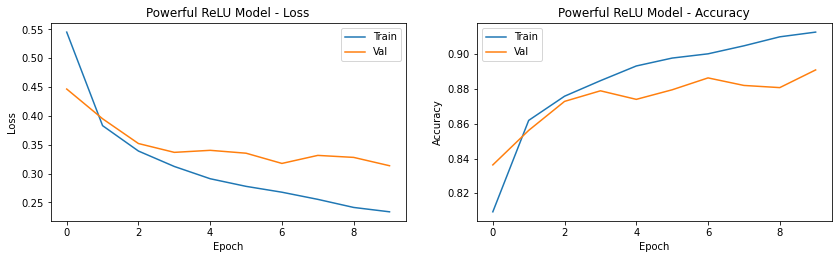

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train_onehot, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2, # 20% held-out 
                    verbose=1)
plot_training(history, model_name='ReLU Model with Adam')

We can see that the loss function descends quicker but almost inmediatly we can start seeing overfitting. 
Let's try changing the learning rate, so we slow down the speed used for descending through the gradient.
We will be adding some dropout and traing during more epochs.

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)              

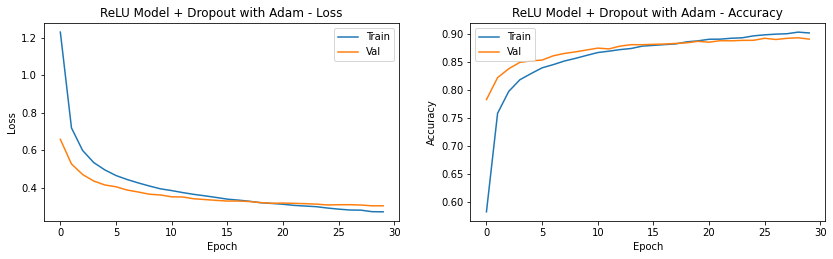

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train_onehot, 
                    epochs=epochs * 3, # 3x epochs we were using.
                    batch_size=batch_size,
                    validation_split=0.2, # 20% held-out 
                    verbose=1)
plot_training(history, model_name='ReLU Model + Dropout with Adam')

In [0]:
evaluate_model(model, x_test, y_test_onehot)
print('\nClassification Report: ')
model_classfication_report(model, x_test, y_test_onehot)

10000/10000 [==============================] - 0s 25us/step
Loss:  0.33092855165600776
ACC:  0.8824999928474426

Classification Report: 
10000/10000 [==============================] - 0s 44us/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.78      0.83      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.68      0.70      1000
           7       0.94      0.93      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Not bad for a feed-forward network, we got `0.88` F1-scorem with some great results for some classes like `Trouser`, `Sandal` and `Bag`.

## A Convolutional Neural Network

Now let's be a little bit more ambitious and use CNNs. We will nedd a GPU to train this network, so better you might want to run this on Colab if you don't have a GPU.

We need to reshape the train and test input to be able to use it with the CNN model. Basically we simply need to add a dimesion (because Conv2D can be used with multiple dimensions, like RGB for images).

In [0]:
x_train_cnn = x_train.reshape(len(x_train), 28, 28, 1)
x_test_cnn = x_test.reshape(len(x_test), 28, 28, 1)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

#adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='RMSProp', 
               loss='categorical_crossentropy', 
               metrics=['acc'])  
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.5958 - acc: 0.7864 - val_loss: 0.3560 - val_acc: 0.8753
Epoch 2/20
48000/48000 [==============================] - 5s 97us/step - loss: 0.3520 - acc: 0.8758 - val_loss: 0.2757 - val_acc: 0.8983
Epoch 3/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.2923 - acc: 0.8978 - val_loss: 0.2451 - val_acc: 0.9105
Epoch 4/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.2589 - acc: 0.9096 - val_loss: 0.2371 - val_acc: 0.9149
Epoch 5/20
48000/48000 [==============================] - 5s 100us/step - loss: 0.2386 - acc: 0.9182 - val_loss: 0.2251 - val_acc: 0.9192
Epoch 6/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.2226 - acc: 0.9226 - val_loss: 0.2221 - val_acc: 0.9220
Epoch 7/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.2139 - acc: 0.9267 - val_loss: 0.2134 - val_

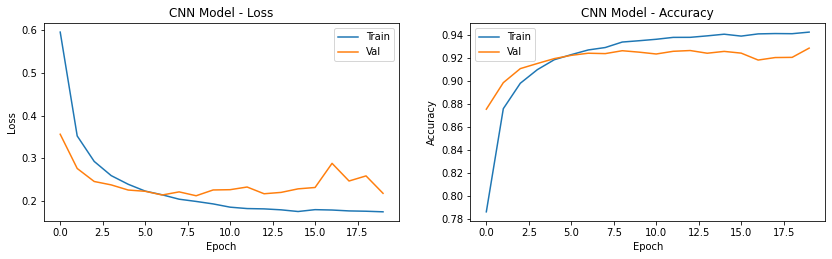

In [17]:
history = model.fit(x_train_cnn, y_train_onehot, 
                    epochs=epochs * 2,
                    batch_size=batch_size,
                    validation_split=0.2, # 20% held-out 
                    verbose=1)
plot_training(history, model_name='CNN Model')

We can see that training converges after about 10 epochs.

In [18]:
evaluate_model(model, x_test_cnn, y_test_onehot)
print('\nClassification Report: ')
predictions = model_classfication_report(model, x_test_cnn, y_test_onehot)

10000/10000 [==============================] - 1s 105us/step
Loss:  0.2267676340341568
ACC:  0.9251999855041504

Classification Report: 
10000/10000 [==============================] - 1s 66us/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.89      0.88      1000
           3       0.92      0.93      0.93      1000
           4       0.88      0.89      0.89      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.77      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Great! we acchieved .91 accuracy and some classes like `Trouser` .99 accuracy.

Now, let's see some classifications:

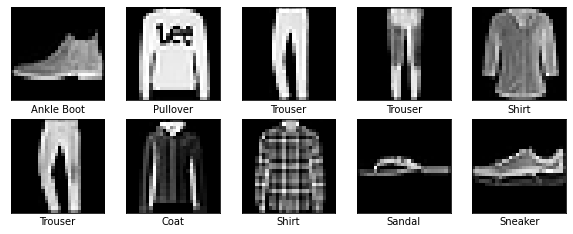

In [21]:
show_images_grid(x_test[0:10], predictions[0:10])